In [2]:
# built-in libraries
import os

# local custom libraries
from classifiers import System

# third party libraries
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# plots will be printed in the notebook
%matplotlib inline

System.print_info()

System Information:
-------------------
Keras Backend: tensorflow
Tensorflow log level: 1
CPUs Available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
-------------------


### Demonstrate the use of dense neural networks for predicting numbers using the MNIST dataset.

Epoch 1/9
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8471 - loss: 0.5135 - val_accuracy: 0.9540 - val_loss: 0.1549
Epoch 2/9
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.9505 - loss: 0.1664 - val_accuracy: 0.9684 - val_loss: 0.1042
Epoch 3/9
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.9632 - loss: 0.1224 - val_accuracy: 0.9734 - val_loss: 0.0864
Epoch 4/9
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.9699 - loss: 0.1004 - val_accuracy: 0.9762 - val_loss: 0.0756
Epoch 5/9
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.9739 - loss: 0.0854 - val_accuracy: 0.9782 - val_loss: 0.0701
Epoch 6/9
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.9775 - loss: 0.0723 - val_accuracy: 0.9803 - val_loss: 0.0650
Epoch 7/9
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.9788 - loss: 0.0692 - val_accuracy: 0.9813 - val_loss: 0.0630
Epoch 8/9
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.9807 - loss: 0.0625 - val_accura

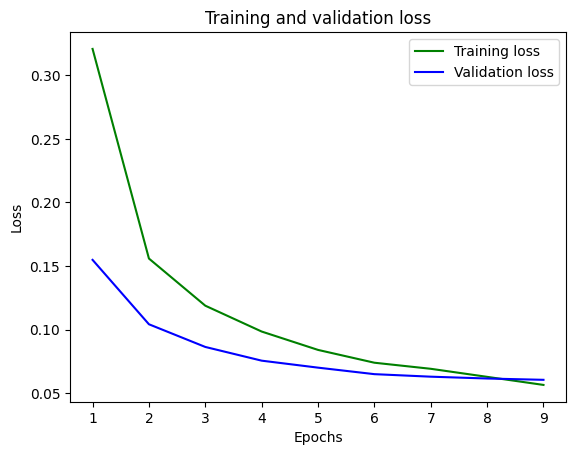

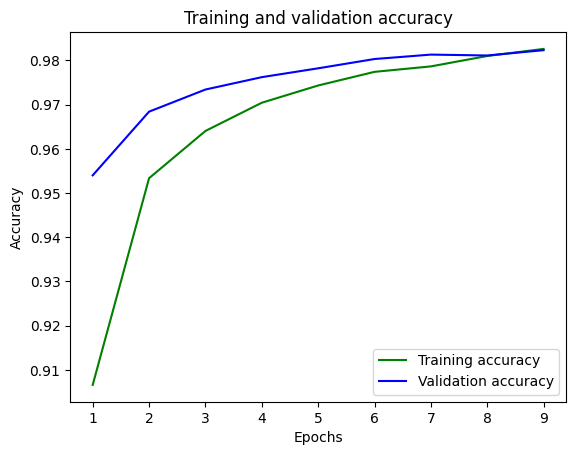

In [4]:
# load image data - 60.000 training set to 10.000 test set of handwritten digits
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape the images so that they fit the network input
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

# normalize the image data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# convert the labels to categorical data types
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# initilaize new network model
# for image classifcation
model = models.Sequential()

# add the input layer - a dense layer, since it extracts feats from data
model.add(layers.Input(shape=(28*28,)))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.5))

# there are 10 digits to be categorized (0-9), so use
# a dense layer (best works for final classifications)
# with softmax for their prediction
model.add(layers.Dense(10, activation='softmax'))

# compile the network
model.compile(
    optimizer='rmsprop', # version of SGD
    loss='categorical_crossentropy',
    metrics=['accuracy']           
)

# now train the neural network 
# on the prepared training data
history = model.fit(
    train_images,
    train_labels,
    epochs=9,
    batch_size=128,
    validation_data=(
        test_images,
        test_labels
    )
)

# test the network performance - loss and accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', round(test_loss, 4), 'Test accuracy:', round(test_acc, 4))

history_loss = history.history['loss']
history_val_loss = history.history['val_loss']
epochs=range(1, len(history_loss) + 1)

plt.plot(epochs, history_loss, 'g', label='Training loss')
plt.plot(epochs, history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.show()

# clear prev plot
plt.clf()

history_accuracy = history.history['accuracy']
history_val_accuracy = history.history['val_accuracy']

plt.plot(epochs, history_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, history_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()

### Demonstrate the use of convolutional neural networks for predicting numbers using the MNIST dataset.

Epoch 1/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8701 - loss: 0.4021 - val_accuracy: 0.9856 - val_loss: 0.0433
Epoch 2/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9856 - loss: 0.0485 - val_accuracy: 0.9913 - val_loss: 0.0274
Epoch 3/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9909 - loss: 0.0307 - val_accuracy: 0.9897 - val_loss: 0.0303
Epoch 4/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9931 - loss: 0.0224 - val_accuracy: 0.9911 - val_loss: 0.0318
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.9892 - loss: 0.0396
Test loss: 0.0318 Test accuracy: 0.9911


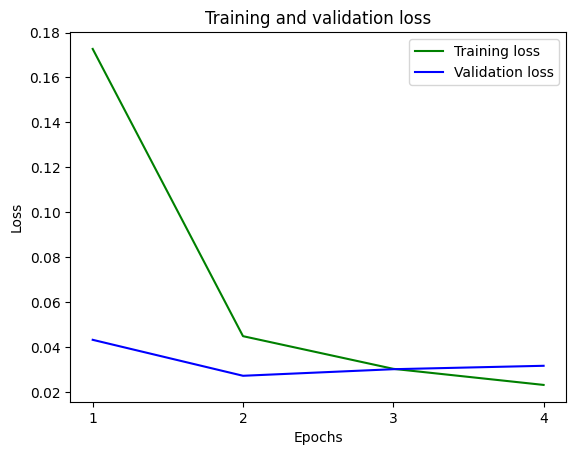

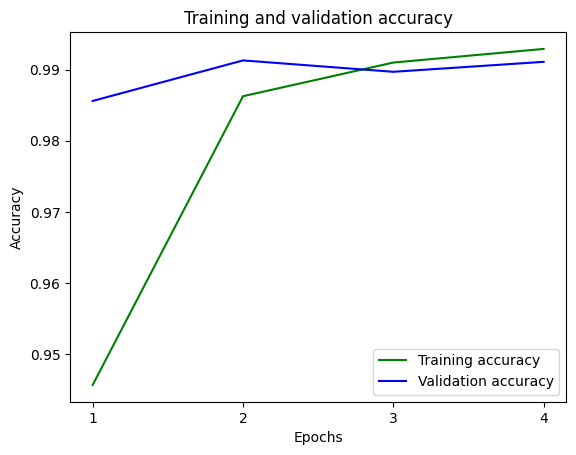

In [8]:

# load image data - 60.000 training set to 10.000 test set of handwritten digits
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape the images so that they fit the network input
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000,28, 28, 1)

# normalize the image data 
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# convert the labels to categorical data types
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# initilaize new CNN model
# for image classifcation
model = models.Sequential()
model.add(layers.Input(shape=(28, 28, 1))) # grayscale images, hence 1 channel
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # recognizes small local patterns
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # recognizes larger patterns from prev layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(96, (3, 3), activation='relu')) # recognizes larger patterns from prev layer

# dense layers work with 1D tensors so
# flatten the output of the last layer
model.add(layers.Flatten())

# now adding dense layers for classification
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 categories

# compile the model 
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']    
)

# start training the model
history = model.fit(
    train_images,
    train_labels,
    epochs=4,
    batch_size=64,
    validation_data=(
        test_images,
        test_labels
    )
)

# evaluate the model in terms of accuracy and loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', round(test_loss, 4), 'Test accuracy:', round(test_acc, 4))

history_loss = history.history['loss']
history_val_loss = history.history['val_loss']
epochs=range(1, len(history_loss) + 1)

plt.plot(epochs, history_loss, 'g', label='Training loss')
plt.plot(epochs, history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.show()

# clear prev plot
plt.clf()

history_accuracy = history.history['accuracy']
history_val_accuracy = history.history['val_accuracy']

plt.plot(epochs, history_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, history_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()